# ASSIGNMENT 1
- Nama          : Lisa Wahyu Ningsih
- Kode peserta  : PYTN-KS15-007
- Kelas		    : KS-015
- Program	    : Python for Data Science

## Visualization dataset
- Line
- Area
- Scatter Plot
- Box Plot
- Word Clouds
- Folium Maps
- Metode Visualization Plot lainnya (Pie Chart, Bar Chart,dan Histogram)

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('london_crime_LWN.csv')
print(df)

          lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015 

In [2]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df.info

<bound method DataFrame.info of           lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                  

untuk menampilkan nilai kolom:

In [4]:
df_a=df.head(10)
df_a.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

Untuk memeriksa apakah ada kolom yang memiliki nilai nol:

In [5]:
print(df.isnull().any())

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool


In [6]:
df_b=df[['borough','value']]

In [7]:
print(df.shape)

(13490604, 7)


In [8]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')
print('Matplotlib version:',mpl.__version__)


Matplotlib version: 3.5.2


### Line Chart

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8184\3578233893.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, color='black')


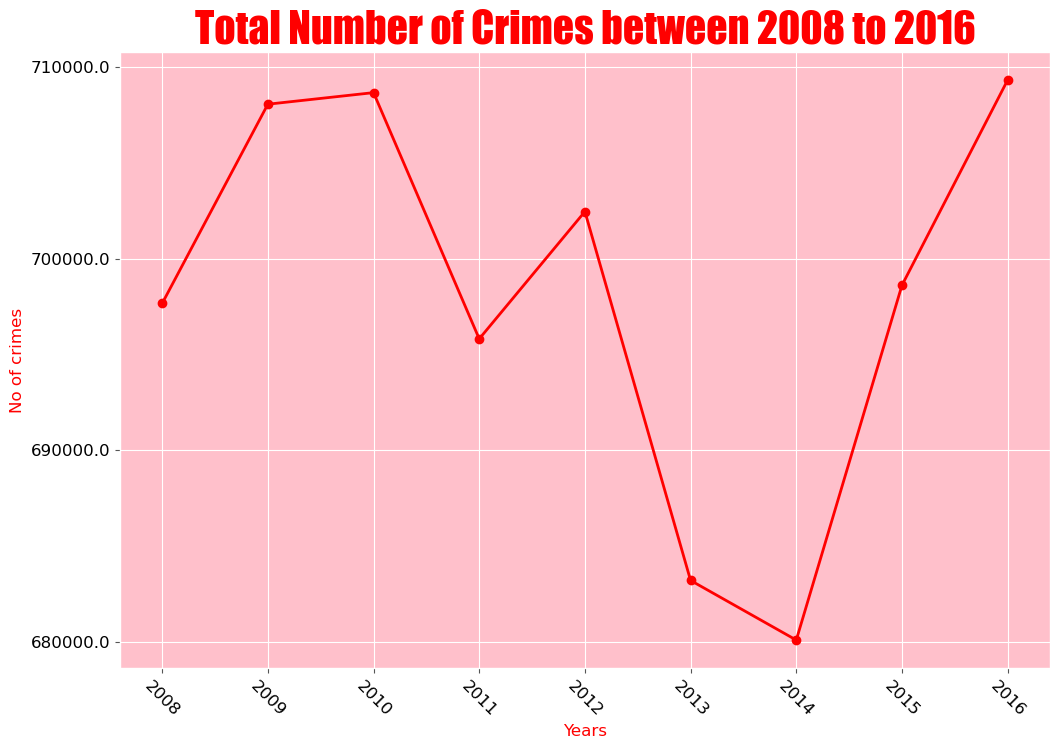

In [10]:
from matplotlib import ticker

Year=df['year'].unique()
sumsandyear=df.groupby('year').sum()
sums=sumsandyear['value'].to_numpy()

n = len(Year)

for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(Year, sums, color='red', marker='o', linestyle='-', linewidth=2)

font2 = {'family': 'Impact',
        'color':  'red',
        'weight': 'bold',
        'size': 30,
        }

ax.set_xticks(Year)
ax.set_xticklabels(Year, rotation=-45, fontsize=12, color='black')
ax.set_yticklabels(ax.get_yticks(), fontsize=12, color='black')
ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))

ax.set_xlabel('Years',color='red')
ax.set_ylabel("No of crimes",color='red')
ax.set_facecolor("pink")

ax.set_title("Total Number of Crimes between 2008 to 2016", fontdict=font2)

plt.show()

##### Interpretasi Output Line Chart:
Berdasarkan output diatas, dapat dilihat bahwa angka kejahatan terendah di london terjadi pada tahun 2014 sedangkan angka kejahatan tertingginya terjadi pada tahun 2016 yang hampir mencapai 710.000 kasus

In [11]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Area Plot

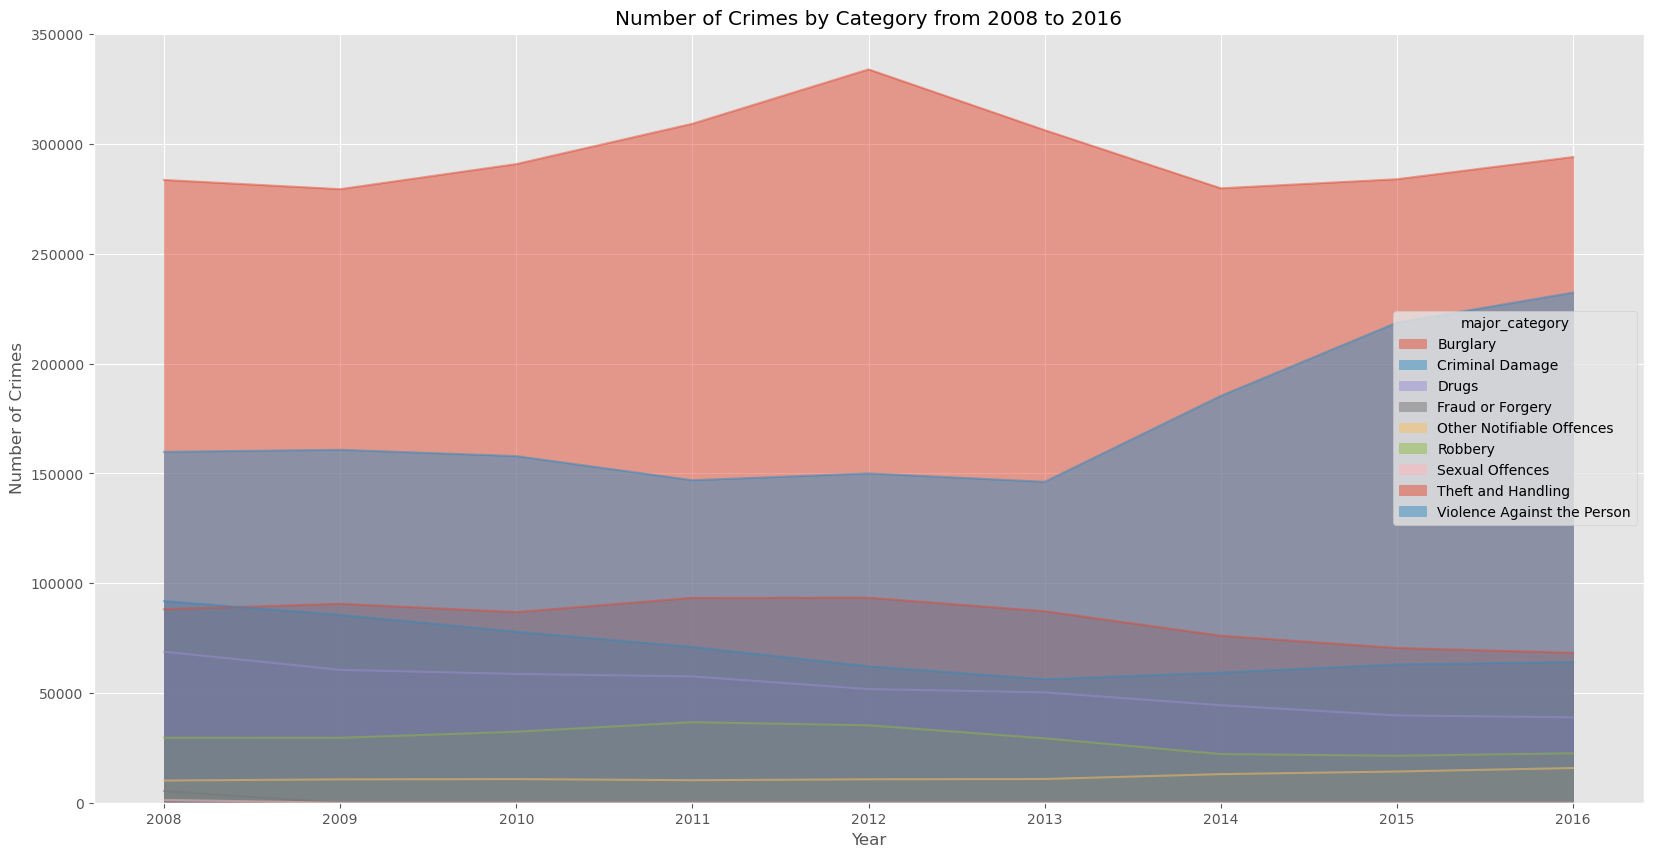

In [12]:
df_crime = df.groupby(['year', 'major_category']).sum()['value'].unstack()
df_crime.plot(kind='area', stacked=False, figsize=(20, 10))

plt.title('Number of Crimes by Category from 2008 to 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.show()

##### Interpretasi Output Area Plot:
Berdasarkan output diatas, dapat dilihat bahwa jenis kejahatan tertinggi adalah pencurian yang mencapai lebih dari 300.000 pada tahun 2012 dan jenis kejahatan kriminal lainnya seperti narkoba, penipuan dan pemalsuan, perampokan, pelecehan seksual, kekrasan, dan lain sebagainya

### Scatter Plot

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

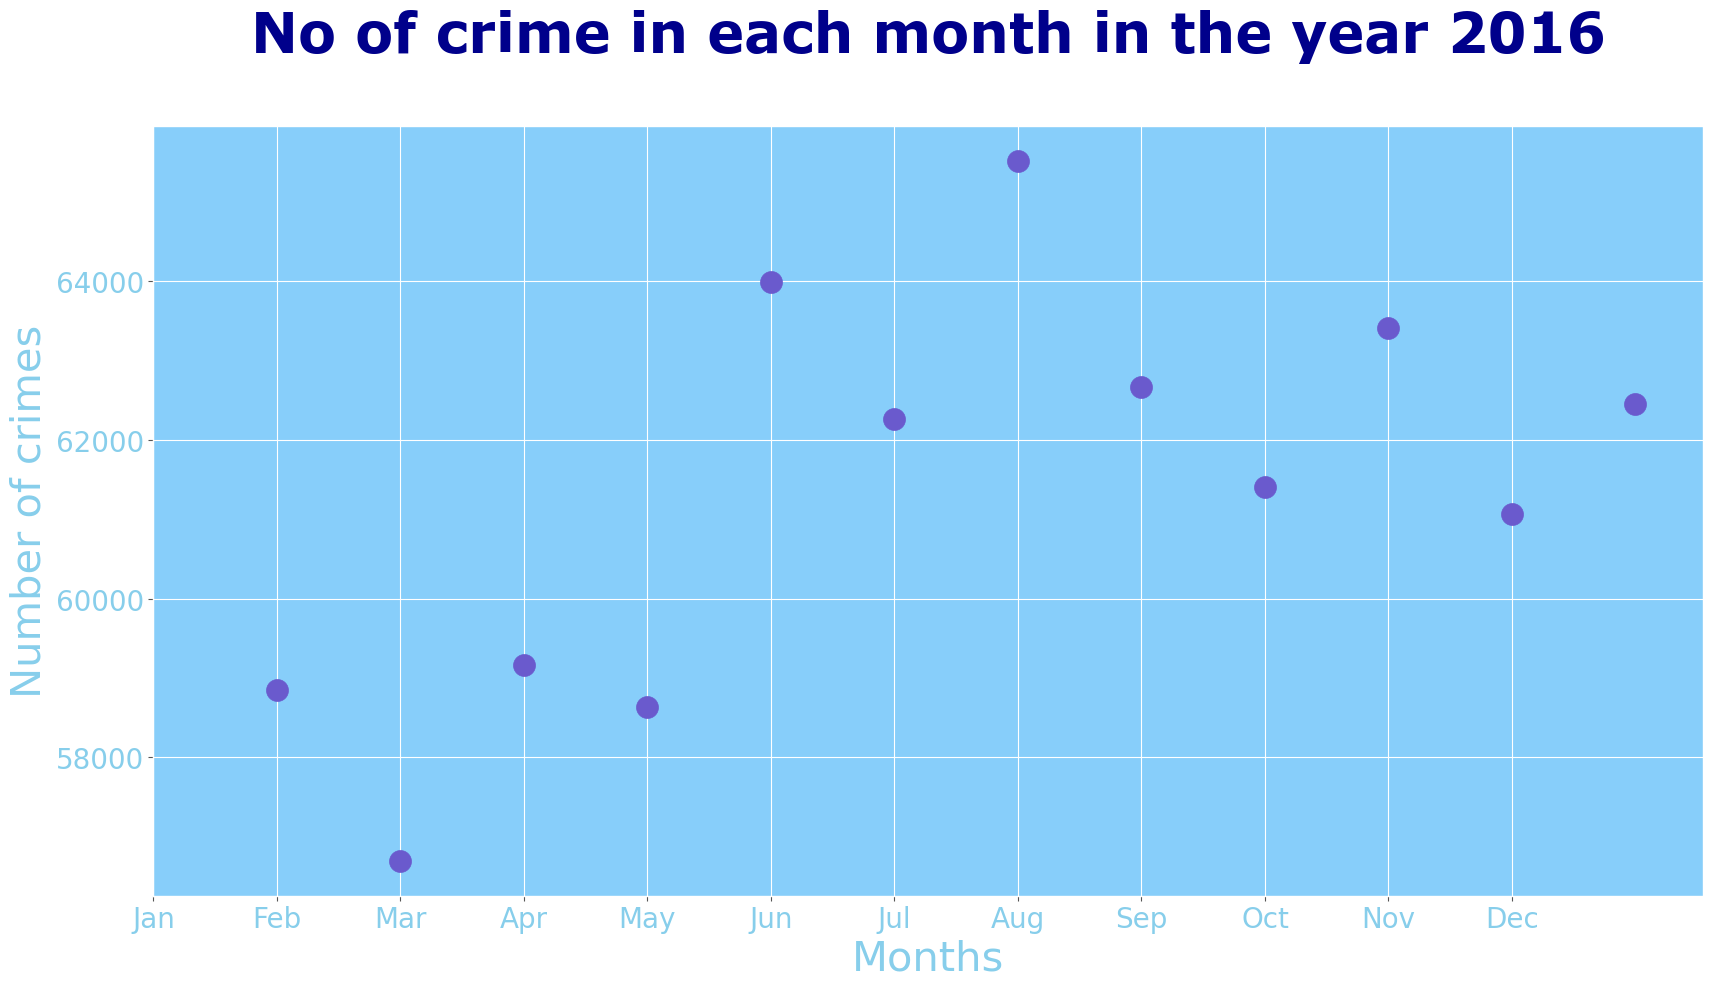

In [13]:
font = {'family': 'Verdana',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 40,
        }
year2016=df.loc[df['year'] == 2016]

months=year2016['month'].unique()

months.sort()

sum_month=year2016.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)
    
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightskyblue")
plt.scatter(xrange,Values,s=250,color='slateblue',cmap='viridis',alpha=1)
plt.title("No of crime in each month in the year 2016\n",fontdict=font)
plt.xlabel('Months',fontsize=30,color='skyblue')
plt.ylabel('Number of crimes',fontsize=30,color='skyblue')
plt.xticks(n1,name_of_months)
plt.xticks(color='skyblue',fontsize=20)
plt.yticks(color='skyblue',fontsize=20)

##### Interpretasi Output Scatter Plot:
Berdasarkan output diatas, dapat dilihat bahwa angka kejahatan terendah di london yang terjadi pada bulan maret tahun 2016 sedangkan angka kejahatan tertingginya terjadi pada bulan agustus tahun 2016 yang mencapai lebih dari 64.000

### Boxplot

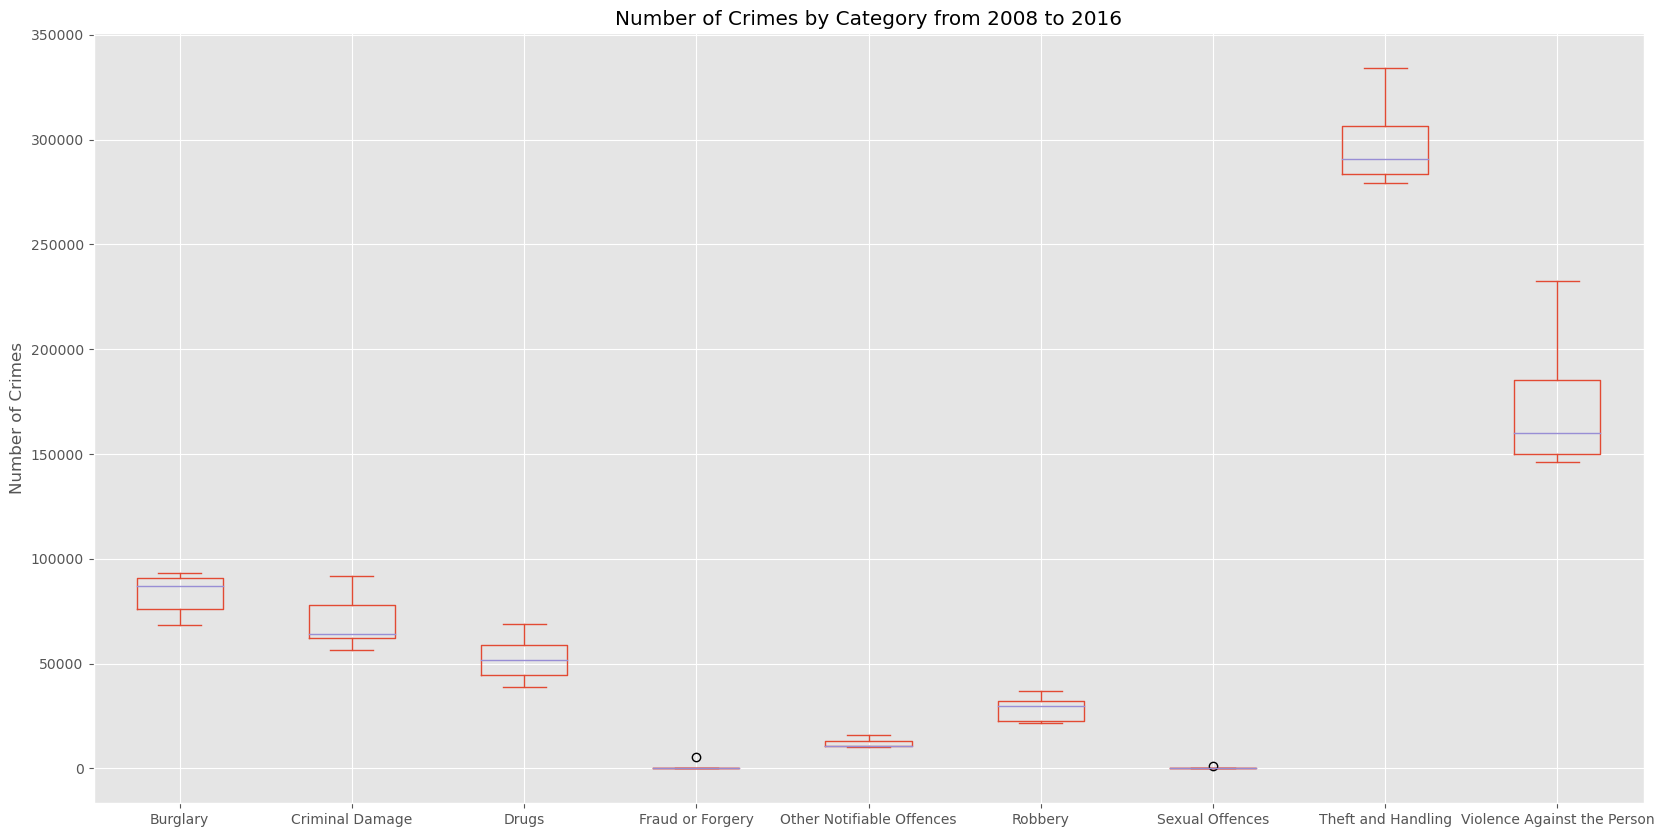

In [14]:
df_crime = df.groupby(['year', 'major_category']).sum()['value'].unstack()
df_crime.plot(kind='box', stacked=False, figsize=(20, 10))

plt.title('Number of Crimes by Category from 2008 to 2016')
plt.ylabel('Number of Crimes')
plt.show()

##### Interpretasi Output Box Plot:
Berdasarkan output diatas, dapat dilihat bahwa data drugs menunjukkan data simetris yang berdistribusi normal, sedangkan untuk data sebaran kejahatan tertinggi yaitu theft and handling yang mencapai angka 300.000 dengan gambar yang tidak simetriss dan menunjukkan kemiringan positif (skewness positif), begitupun data violence against the person. Sedangkan data Burglary menunjukkan kemiringan negatif atau skewness negatif.

### Word Clouds

In [15]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install stopwords

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
import wordcloud

In [18]:
import stopwords

In [20]:
from wordcloud import WordCloud, STOPWORDS

In [21]:
stopwords=set(STOPWORDS)

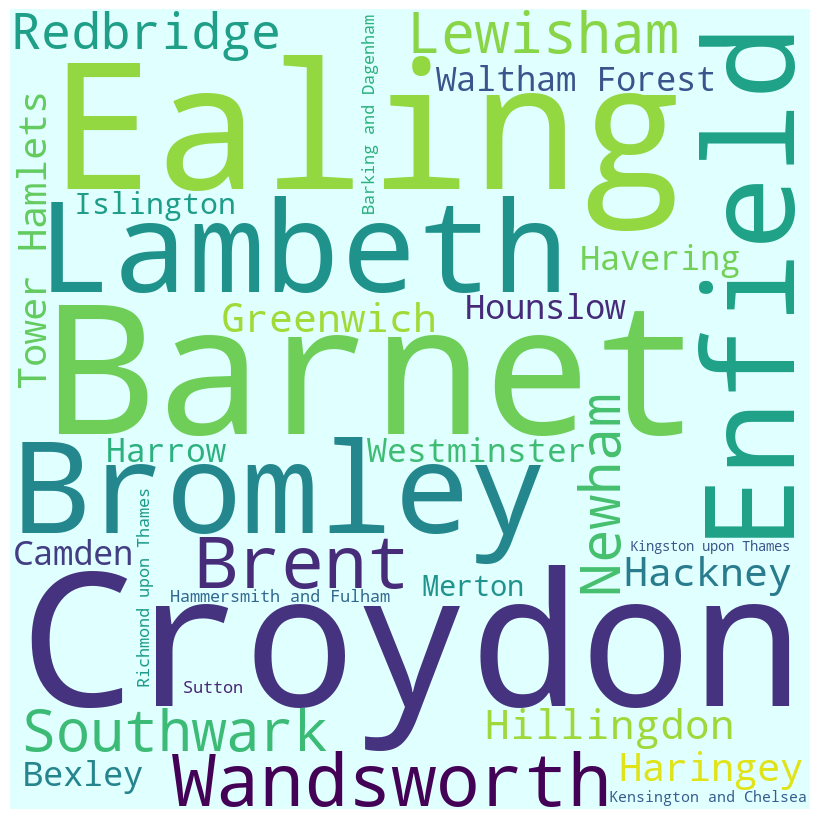

In [23]:

borough = df.groupby('borough').size().reset_index(name='counts')

word_dict = dict(zip(borough['borough'].tolist(), borough['counts'].tolist()))

wordcloud = WordCloud(width = 800, height = 800, background_color ='lightcyan', min_font_size = 10).generate_from_frequencies(word_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Folium Maps

In [ ]:
pip install folium

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


In [ ]:
import folium

In [ ]:
world_map = folium.Map(location=[51.5074, -0.1278],
                        zoom_start=8)
world_map

##### define london map with high zoom level

In [ ]:

world_map = folium.Map(location=[51.5074, -0.1278],
                        zoom_start=15)
world_map

#### define london map with low zoom level

In [ ]:

world_map = folium.Map(location=[51.5074, -0.1278],
                        zoom_start=5)
world_map

In [ ]:
world_map = folium.Map(location=[51.5033, -0.1195],
                        zoom_start=25, popup = "London Eye")
world_map

In [ ]:
world_map = folium.Map(location=[51.5055, -0.0754],
                        zoom_start=25, popup = "Tower Bridge")
world_map

### Metode visualisasi data lainnya (yang telah dipelajari)
- pie chart
- bar chart
- histogram

#### Pie Chart

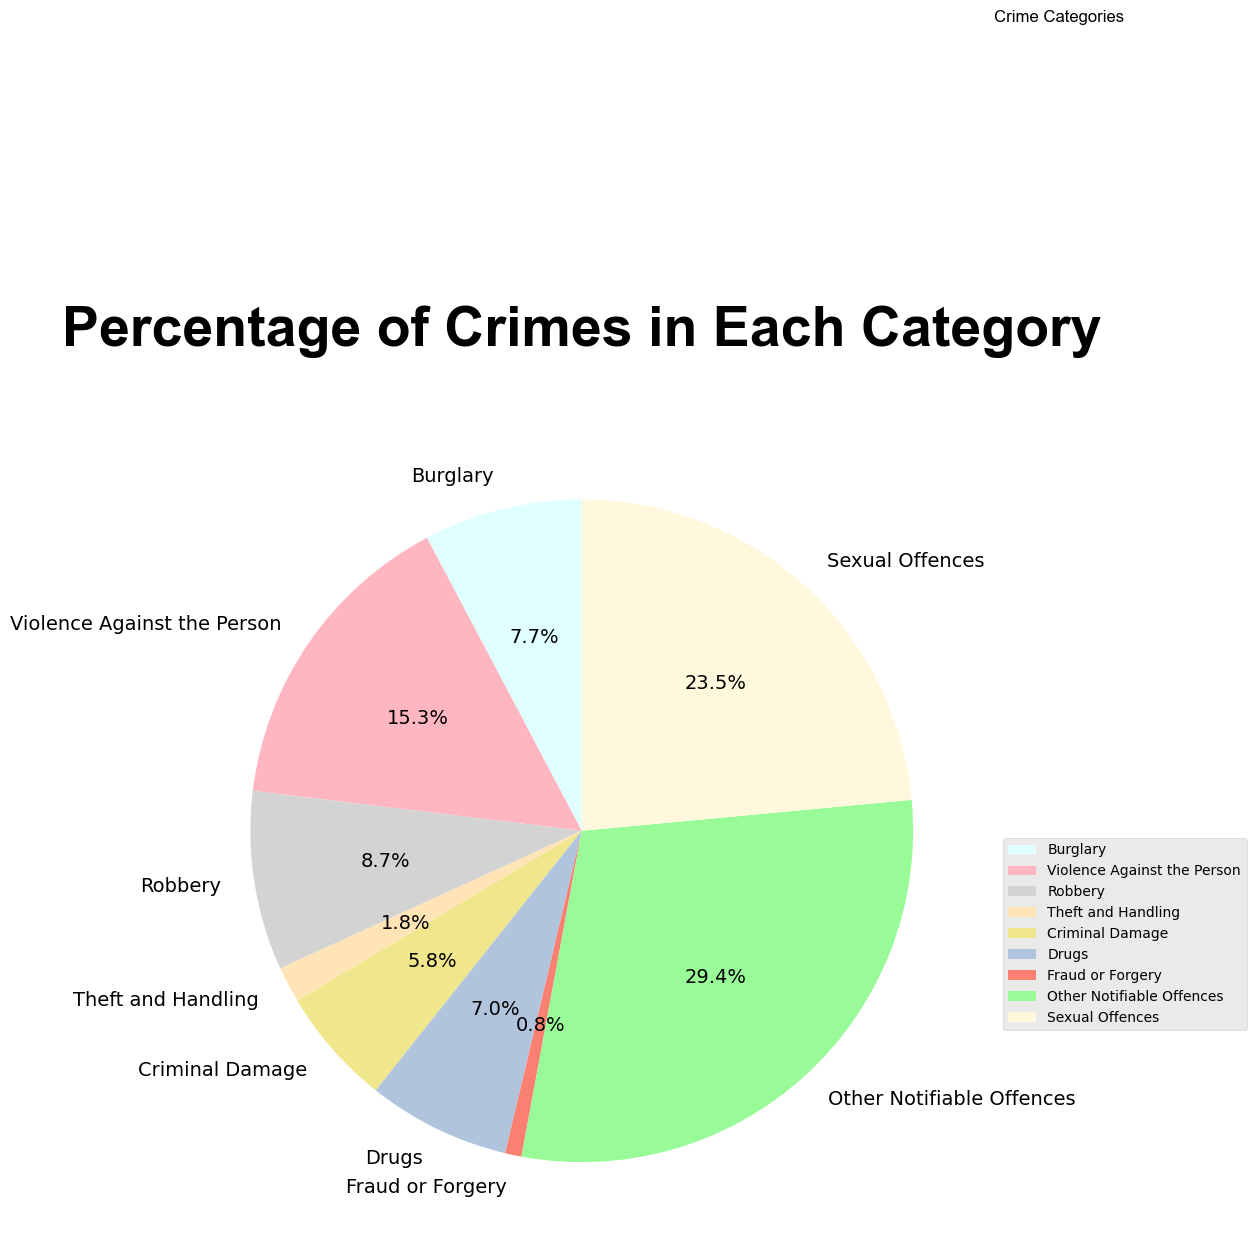

In [ ]:

font2 = {'family': 'Arial',
        'color':  'black',
        'weight': 'bold',
        'size': 40,
        }

labels = df['major_category'].unique()
sizes = df.groupby(['major_category']).size()
colors = ['lightcyan', 'lightpink', 'lightgray', 'moccasin', 'khaki', 'lightsteelblue', 'salmon', 'palegreen', 'cornsilk']

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor("maroon")

plt.title('Percentage of Crimes in Each Category\n', fontdict=font2)
ab = plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14, 'color': 'black'})

plt.legend(labels, loc="best", prop={'size': 10}, bbox_to_anchor=(1, 0.5))

plt.suptitle('Crime Categories', fontdict=font2, x=0.8, y=1.25, ha='center')
plt.tight_layout()

plt.show()

##### Interpretasi Output Pie Chart:
Berdasarkan output diatas, dapat dilihat bahwa jenis kejahatan tertinggi adalah kejahatan jenis pelanggaran lainnya, disusul oleh pelecehan seksual, kekerasan terhadap seseorang,perampokan, pencurian, narkoba, dan kejahatan kriminal lainnya

#### Bar Chart

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8184\2528920176.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=-45)


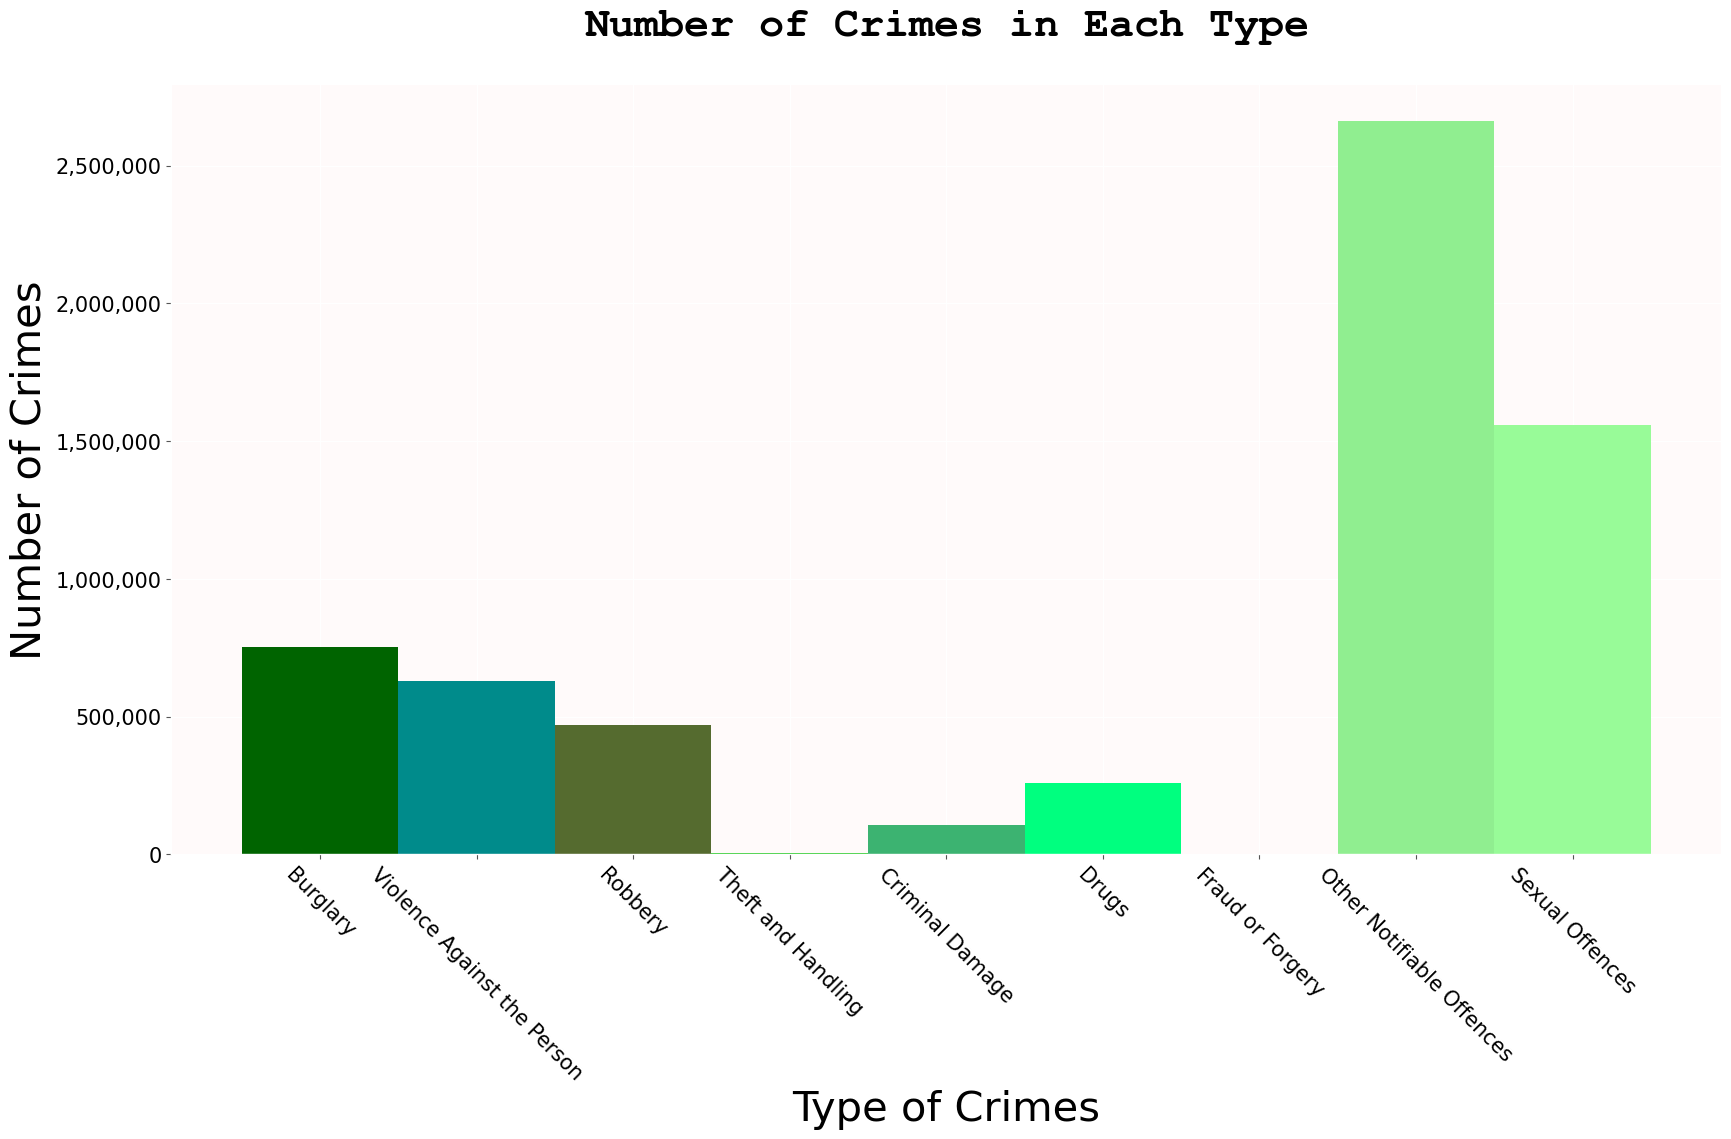

In [30]:
font = {'family': 'Courier New',
        'color':  'black',
        'weight': 'bold',
        'size': 30,
        }

categories = df['major_category'].unique()

totals = df.groupby('major_category').sum()
totals = totals['value'].to_numpy()

colors = ['darkgreen','darkcyan','darkolivegreen','limegreen','mediumseagreen',
          'springgreen','yellowgreen','lightgreen','palegreen']

fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor("snow")

ax.bar(categories, totals, color=colors, width=1)

ax.set_xlabel('Type of Crimes', fontsize=30, color='black')
ax.set_ylabel('Number of Crimes', fontsize=30, color='black')

ax.tick_params(axis='both', which='major', labelsize=15, labelcolor='black')
ax.set_xticklabels(categories, rotation=-45)
ax.yaxis.set_major_formatter('{x:,.0f}')

ax.set_title('Number of Crimes in Each Type\n', fontdict=font)

plt.show()

##### Interpretasi Output Bar Chart:
Berdasarkan output diatas, dapat dilihat bahwa jenis kejahatan tertinggi adalah kejahatan jenis pelanggaran lainnya, disusul oleh pelecehan seksual, pencurian, kekerasan terhadap seseorang,perampokan, narkoba, dan kejahatan kriminal lainnya

#### Histogram

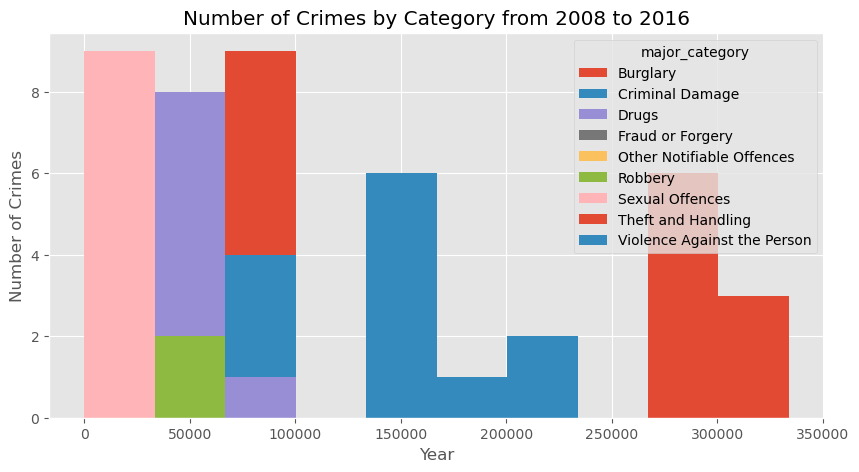

In [ ]:
df_crime = df.groupby(['year', 'major_category']).sum()['value'].unstack()
df_crime.plot(kind='hist', stacked=False, figsize=(10, 5))

plt.title('Number of Crimes by Category from 2008 to 2016')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.show()

##### Interpretasi Output Histogram:
Berdasarkan output diatas, dapat dilihat bahwa jenis kejahatan tertinggi adalah pencurian, disusul dengan kekerasan dan narkoba serta kejahatan lainnya

### Interpretasi secara keseluruhan:
Berdasarkan berbagai visualisasi data yang telah dilakukan dapat dilihat bahwa kejahatan yang terjadi di london antara tahun 2008-2016 sangat beragam. Kejahatan terendah terjadi pada tahun 2014 sedangkan kejahatan tertingginya terjadi pada tahun 2016 tepatnya pada bulan agustus. Untuk jenis kejahatan yang paling tinggi sendiri adalah kekerasan, pencurian, perampokan, narkoba dan kejahatan kriminal lainnya